In [1]:
import lpr_model
import os
import pickle 
import pandas as pd
import editdistance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
DATA_PATH = 'data/testset'

In [16]:
lpr = lpr_model.EAST_CRNN()
lpr.load(east_path="model_weights/frozen_east_text_detection.pb",
         crnn_path="model_weights/CRNN30.pth")

***

                   path   gTruth      pred editDistance
0     015524_VA4465.jpg   VA4465    VA4465            0
1    013028_WXH5431.jpg  WXH5431   WXH5431            0
2    010159_BPF7684.jpg  BPF7684   BPF7684            0
3    011637_WVU2019.jpg  WVU2019   WVU2019            0
4    010108_JKP3153.jpg  JKP3153   JKP3153            0
5    016049_VCT3940.jpg  VCT3940   VCT3940            0
6    011115_AHX6805.jpg  AHX6805   AHX6805            0
7    019014_BCF3813.jpg  BCF3813   BCF3813            0
8    019315_BNA9237.jpg  BNA9237   BNA9237            0
9    011993_VBM3459.jpg  VBM3459   VBM3459            0
10   013483_WQL8067.jpg  WQL8067    QL8057            2
11   017159_BGB2563.jpg  BGB2563   BGB2563            0
12   018618_WRC1604.jpg  WRC1604   WRQ1604            1
13   013324_WB9440Q.jpg  WB9440Q   BB9440Q            1
14   014710_BHG7859.jpg  BHG7859   BHG7859            0
15   014758_QTP2364.jpg  QTP2364   QTP2364            0
16   019451_WWW1471.jpg  WWW1471   WWW1471      

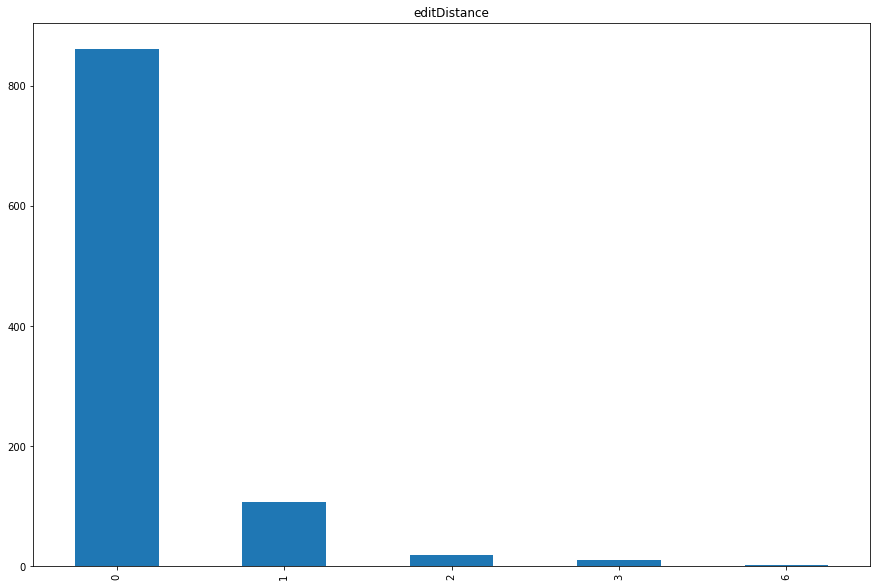

In [17]:
result = pd.DataFrame([], columns=['path', 'gTruth', 'pred', 'editDistance'])

for file in os.listdir(DATA_PATH):
    if file != '.ipynb_checkpoints':
        
        # ground truth
        filename, file_extension = os.path.splitext(file)
        gt = filename.split('_')[-1]
        
        # prediction
        pred = lpr.predict(os.path.join(DATA_PATH, file))
        
        # distance
        dist = editdistance.eval(gt, pred)
        
        result = result.append({'path': file,
                                'gTruth': gt,
                                'pred': pred,
#                                 'conf': pred[1],
                                'editDistance': dist}, ignore_index=True)

# print results, accuracy, plot
print(result)
print('\n')
print("Accuracy:", accuracy_score(result.gTruth, result.pred))
print('\n')

print(results.editDistance.value_counts(sort=False))
# freq = result.editDistance.value_counts(sort=False)
# freq.plot(kind='bar', title='editDistance', figsize=(15, 10))
# plt.show()

Predictions With Edit Distance Larger than 2

In [9]:
result.loc[result.editDistance >= 2, ['gTruth', 'pred']]

,gTruth,pred
6,PUTRAJAYA999,PTR04W999
19,PUTRAJAYA999,WT8J1999
27,CXC6666,C6666CXC6
32,BXB8,BXB840
35,XOCZ9898,XDC229898
47,PUTRAJAYA999,WTRA1999
48,XOCZ9898,X0C29898
56,PUTRAJAYA999,WRU44999
57,XOCZ9898,V898XDC75
65,XOCZ9898,X0C29898


In [20]:
# save results
result.to_csv("err_analysis/testset_result.csv", index=False)
result.loc[result.editDistance >= 2, ['gTruth', 'pred']].to_csv("err_analysis/testset_high_err.csv", index=False)

In [19]:
print(result.editDistance.value_counts(sort=False))

0    862
1    107
2     19
3     10
6      2
Name: editDistance, dtype: int64


***

In [24]:
temp = pd.read_csv("err_analysis/siteImg_result.csv")

In [25]:
temp.editDistance.value_counts(sort=False)

0    149
1     40
2      6
3      2
5      2
6      2
7      1
8      3
9      1
Name: editDistance, dtype: int64

In [26]:
temp = pd.read_csv("err_analysis/siteImg_result_0.723301.csv")

In [27]:
temp.editDistance.value_counts(sort=False)

0    149
1     40
2      7
3      2
4      1
5      1
6      2
7      1
8      3
Name: editDistance, dtype: int64